In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from stl import mesh
from mpl_toolkits import mplot3d
import pandas as pd
import sys
import os
sys.path.insert(1, '../../PENTrackAnalysis/')
import ParticlePlottingFunctions as ppf


In [3]:
def returnVals(data, xrange, yrange, zrange):
    
    x=data[1]
    y=data[2]
    z=data[3]
    Bx=data[4]
    By=data[5]
    Bz=data[6]
    
#     if isinstance(xrange, list):
#         xbounds = np.where((x >= xrange[0]) & (x <= xrange[1]))
#     else:
#         xbounds = np.ndindex(*x.shape)

    xbounds = np.where((x >= xrange[0]) & (x <= xrange[1]))
    ybounds = np.where((y >= yrange[0]) & (y <= yrange[1]))
    zbounds = np.where((z >= zrange[0]) & (z <= zrange[1]))

    allIn = [i for i in xbounds[0] if (i in ybounds[0]) & (i in zbounds[0])]
    
    return x[allIn], y[allIn], z[allIn], Bx[allIn], By[allIn], Bz[allIn]

In [57]:
# file = "data_export/map_export_all_[-141.8,98.2]_[-327.2,192.8]_[-234.3,114.2].csv" #the one I made

# file = "data_export/map_export_[-141.8,98.2]_[-327.2,192.8]_[-100.0,100.0].csv"
# file = "data_export/map_export_[-141.8,98.2]_[-327.2,192.8]_[-100.0,300.0].csv"
# file = "data_export/map_export_[-141.8,98.2]_[-327.2,192.8]_[-200.0,400.0].csv"
file = "data_export/map_interpXcut50_[-141.8,98.2]_[-327.2,192.8]_[-180.0,250.0].csv"


# cols = np.genfromtxt(file, delimiter=',', userows=1, dtype='|S19')
BField_Names = np.genfromtxt(file, delimiter=',', names=True).dtype.names

BField_data = np.genfromtxt(file, delimiter=',', skip_header=1).T

# df_BField_data = pd.read_csv("data_export/map_export_all_[-141.8,98.2]_[-327.2,192.8]_[-234.3,114.2].csv", comment='#')

('index', 'x', 'y', 'z', 'B_x', 'B_y', 'B_z')
-21.799999999999997 -21.799999999999997
-327.25 192.75
-154.28000000000003 -74.28


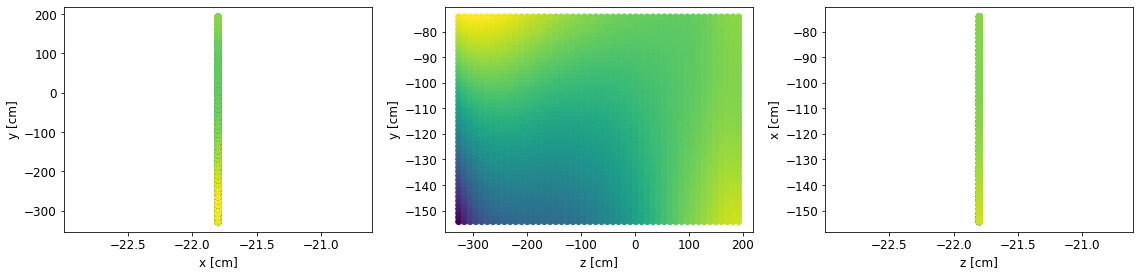

In [58]:
# df_BField_data
print(BField_Names)
for dim in BField_data[1:4]:
    print(np.min(dim), np.max(dim))

fig, axs = plt.subplots(1, 3, figsize=(16,4))
M = np.sqrt(BField_data[4]**2+BField_data[5]**2+BField_data[6]**2)
# print(M)

axs[0].scatter(BField_data[1], BField_data[2], c=M)
axs[0].set_ylabel('y [cm]')
axs[0].set_xlabel('x [cm]')
# axs[0].set_xlim(0, 1.5)

axs[1].scatter(BField_data[2], BField_data[3], c=M)
axs[1].set_ylabel('y [cm]')
axs[1].set_xlabel('z [cm]')
# axs[1].set_xlim(0, 1.5)

axs[2].scatter(BField_data[1], BField_data[3], c=M)
axs[2].set_ylabel('x [cm]')
axs[2].set_xlabel('z [cm]')

plt.tight_layout()
plt.show()

# print()

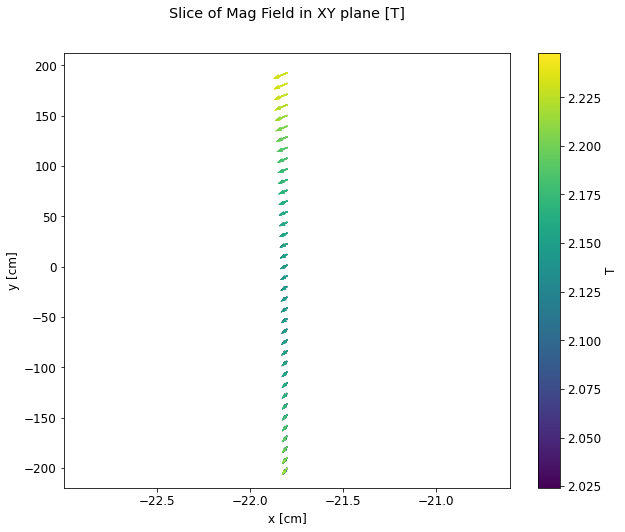

In [54]:
plt.rcParams['font.size'] = '12'
# print(returnVals(BField_data, [0, 150], [-1, 10], [-.5, .5]))
x,y,z,Bx,By,Bz = returnVals(BField_data, [-200, 200], [-200, 200], [-120, -90])

# x = df_BField_data['x']
# y = df_BField_data['y']
# z = df_BField_data['z']
# Bx = df_BField_data['B_x']
# By = df_BField_data['B_y']
# Bz = df_BField_data['B_z']

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Slice of Mag Field in XY plane [T]' ,pad=35)

M = np.sqrt(Bx**2+By**2+Bz**2)
# print(M)
Q = ax1.quiver(x, y, Bx,By, M, units='width')

cbar = fig1.colorbar(Q, label="T")
ax1.set_xlabel("x [cm]")
ax1.set_ylabel("y [cm]")

# axes.xaxis.labelpad=20
# axes.yaxis.labelpad=15

plt.show()

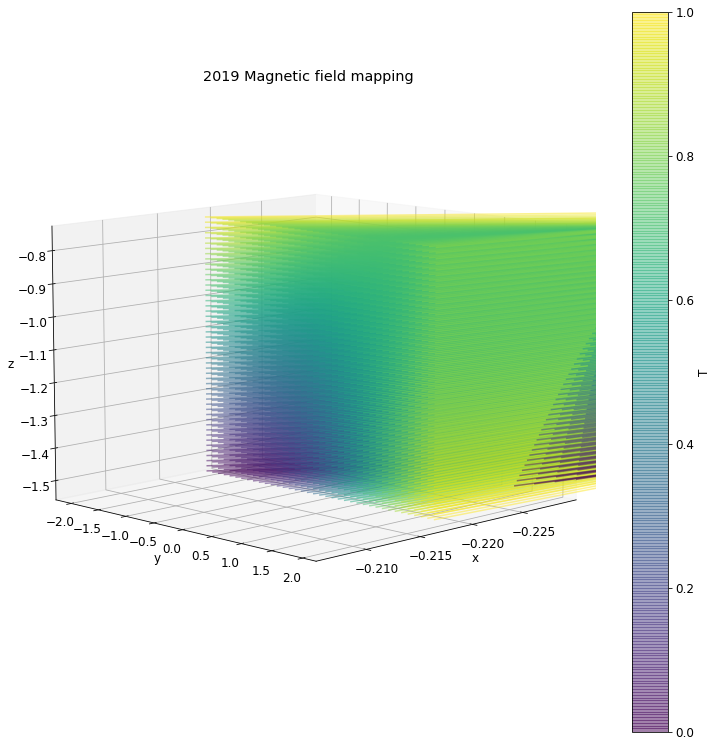

In [56]:
###### plt.rcParams['font.size'] = '22'
fig = plt.figure(figsize=(10, 10))
axes = mplot3d.Axes3D(fig)

# axes.set_title("Electric Field for bias of 800 V", pad=-10)
plt.title("2019 Magnetic field mapping", pad=-10)

x,y,z,Bx,By,Bz = returnVals(BField_data, [-200, 200], [-200, 200], [-200, 200], )
c = np.sqrt(Bx**2+By**2+Bz**2)

# """
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# """
# Colormap
# # c = plt.cm.viridis(c)
# Q = axes.quiver(x/100,y/100,z/100,Bx,By,Bz, length=.4, alpha=0.5)

c = plt.cm.viridis(c)
Q = axes.quiver(x/100,y/100,z/100,Bx,By,Bz, colors=c, length=.4, normalize=True, alpha=0.5)
cbar = fig.colorbar(Q, label="T")

#loads all the file I have in this folder as STLs
STLpath = '../../PENTrackAnalysis/STLsToGraph'
stl_array = os.listdir(STLpath)

for STLfile in stl_array:
#     print(STLfile)
    ppf.graphSTL(STLpath+'/'+STLfile, axes)
    
axes.view_init(elev=10., azim=45)
# axes.set_xlim(-4, 6)
# axes.set_ylim(-2, 1)
# axes.set_zlim(-0.6, 0.6)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()


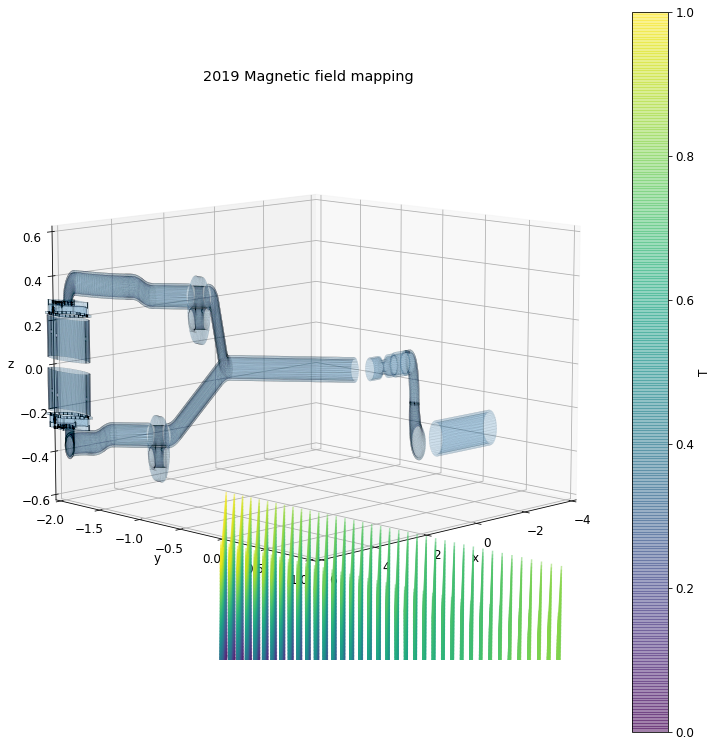

In [55]:
###### plt.rcParams['font.size'] = '22'
fig = plt.figure(figsize=(10, 10))
axes = mplot3d.Axes3D(fig)

# axes.set_title("Electric Field for bias of 800 V", pad=-10)
plt.title("2019 Magnetic field mapping", pad=-10)

x,y,z,Bx,By,Bz = returnVals(BField_data, [-200, 200], [-200, 200], [-200, 200], )
c = np.sqrt(Bx**2+By**2+Bz**2)

# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.viridis(c)

Q = axes.quiver(x/100,y/100,z/100,Bx,By,Bz, colors=c, length=.4, normalize=True, alpha=0.5)
cbar = fig.colorbar(Q, label="T")

#loads all the file I have in this folder as STLs
STLpath = '../../PENTrackAnalysis/STLsToGraph'
stl_array = os.listdir(STLpath)

for STLfile in stl_array:
#     print(STLfile)
    ppf.graphSTL(STLpath+'/'+STLfile, axes)
    
axes.view_init(elev=10., azim=45)
axes.set_xlim(-4, 6)
axes.set_ylim(-2, 1)
axes.set_zlim(-0.6, 0.6)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

In [59]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

df_BField_data = pd.read_csv(file, comment='#')

Bx_dense = df_BField_data["B_x"]
By_dense = df_BField_data["B_y"]
Bz_dense = df_BField_data["B_z"]

x_dense = df_BField_data["x"]
y_dense = df_BField_data["y"]
z_dense = df_BField_data["z"]

# df_BField_data
# print(y_dense)

<ipython-input-60-6ae48eb63d30>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_xticklabels(ax4.get_xticks(),  rotation=50,
<ipython-input-60-6ae48eb63d30>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(ax4.get_yticks(),  rotation=-25,
<ipython-input-60-6ae48eb63d30>:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig2.tight_layout(pad=3,rect=[0, 0, 1, 0.99])# plt.colorbar(sc, ax=ax4)


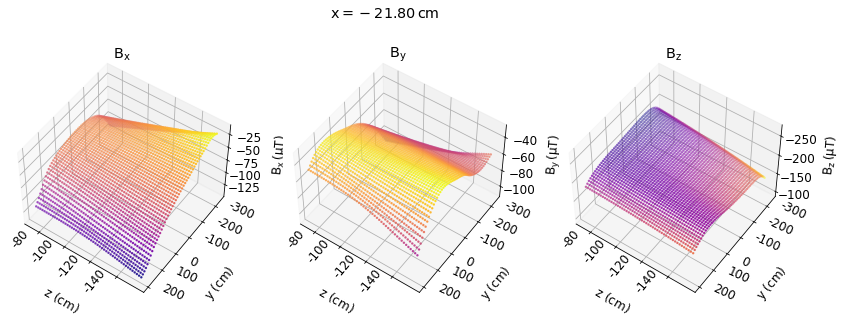

In [60]:
# ### Producing the plots
plt.rcParams['font.size'] = '12'
fig2 = plt.figure(facecolor='white', figsize=(14,5))

ax4 = fig2.add_subplot(131, projection='3d')
ax5 = fig2.add_subplot(132, projection='3d')
ax6 = fig2.add_subplot(133, projection='3d')


for axi in [ax4, ax5, ax6]:
    axi.view_init(elev=50., azim=125) # you may need to adjsut it for better data visibility
    
#     axi.set_xlim3d(z_min,z_max) # this is for a purpose to produce plots with z=0 : floor
#     axi.set_ylim3d(y_min,y_max)    

    axi.set_xticklabels(ax4.get_xticks(),  rotation=50,
                    verticalalignment='baseline',
                    horizontalalignment='right')
    axi.set_yticklabels(ax4.get_yticks(),  rotation=-25,
                    verticalalignment='baseline',
                    horizontalalignment='left')    

    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
                                  
    axi.set_xlabel('$\mathsf{z}$ (cm)', rotation=7, labelpad=10)
    axi.set_ylabel('$\mathsf{y}$ (cm)',  labelpad=15)

ax6.set_zlim(-90,-275) # invert the z-axis direction for B_z, just for visualization purpose  

sc4_int = ax4.scatter(z_dense, y_dense, Bx_dense*100, c=Bx_dense*100, marker='.', lw=.1, cmap=cm.plasma)
sc5_int = ax5.scatter(z_dense, y_dense, By_dense*100, c=By_dense*100, marker='.', lw=.1, cmap=cm.plasma)
sc6_int = ax6.scatter(z_dense, y_dense, Bz_dense*100, c=(Bz_dense)*100, marker='.', lw=.1, cmap=cm.plasma)

ax4.set_title('$\mathsf{B_x}$') 
ax4.set_zlabel('$\mathsf{B_x\,(\mu T)}$', rotation=180, labelpad=10)

ax6.set_zlabel('$\mathsf{B_z\,(\mu T)}$', rotation=180, labelpad=10)
ax6.set_title('$\mathsf{B_z}$')

ax5.set_zlabel('$\mathsf{B_y\,(\mu T)}$', rotation=180, labelpad=10)
ax5.set_title('$\mathsf{B_y}$')

fig2.suptitle('$\mathsf{x=%.2f\,cm}$'%(x_dense[1]))

fig2.tight_layout(pad=3,rect=[0, 0, 1, 0.99])# plt.colorbar(sc, ax=ax4)
plt.show()